In [1]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from JenaClimate import JenaClimate
from plot_util import plot_history

Using TensorFlow backend.


In [2]:
jena_climate = JenaClimate()
train_gen, val_gen, test_gen = jena_climate.build_generator()

In [3]:
model = Sequential()
model.add(Conv1D(32, 5, activation='relu', input_shape=(None, 14)))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mae')

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 7,457
Trainable params: 7,457
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit_generator(
    train_gen, steps_per_epoch=500, epochs=20,
    validation_data=val_gen, validation_steps=jena_climate.val_steps,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/20
 - 14s - loss: 0.4380 - val_loss: 0.4530
Epoch 2/20
 - 12s - loss: 0.3954 - val_loss: 0.4758
Epoch 3/20
 - 12s - loss: 0.3793 - val_loss: 0.4519
Epoch 4/20
 - 12s - loss: 0.3705 - val_loss: 0.4478
Epoch 5/20
 - 12s - loss: 0.3599 - val_loss: 0.4561
Epoch 6/20
 - 12s - loss: 0.3541 - val_loss: 0.4648
Epoch 7/20
 - 12s - loss: 0.3497 - val_loss: 0.4505
Epoch 8/20
 - 12s - loss: 0.3412 - val_loss: 0.4563
Epoch 9/20
 - 12s - loss: 0.3385 - val_loss: 0.4454
Epoch 10/20
 - 12s - loss: 0.3365 - val_loss: 0.4504
Epoch 11/20
 - 12s - loss: 0.3307 - val_loss: 0.4542
Epoch 12/20
 - 12s - loss: 0.3294 - val_loss: 0.4718
Epoch 13/20
 - 12s - loss: 0.3256 - val_loss: 0.4619
Epoch 14/20
 - 12s - loss: 0.3230 - val_loss: 0.4869
Epoch 15/20
 - 12s - loss: 0.3222 - val_loss: 0.4568
Epoch 16/20
 - 12s - loss: 0.3181 - val_loss: 0.4575
Epoch 17/20
 - 12s - loss: 0.3157 -

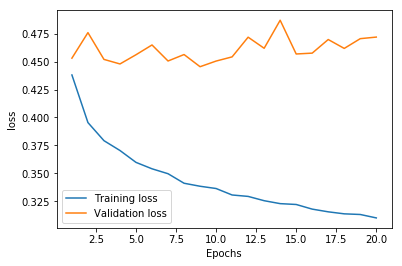

In [6]:
plot_history(history, metrics=['loss'])